In [1]:
import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display, Markdown

import sys
sys.path.append('..')
import helpers, datasets, surfaces, matrices

sns.set_style('ticks')

/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


Warning: This uses a lot of resources given the huge size of the vertex-wise LTC matrix.

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-None_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Finding parcel centers in L hemisphere
Finding parcel centers in R hemisphere
BA17


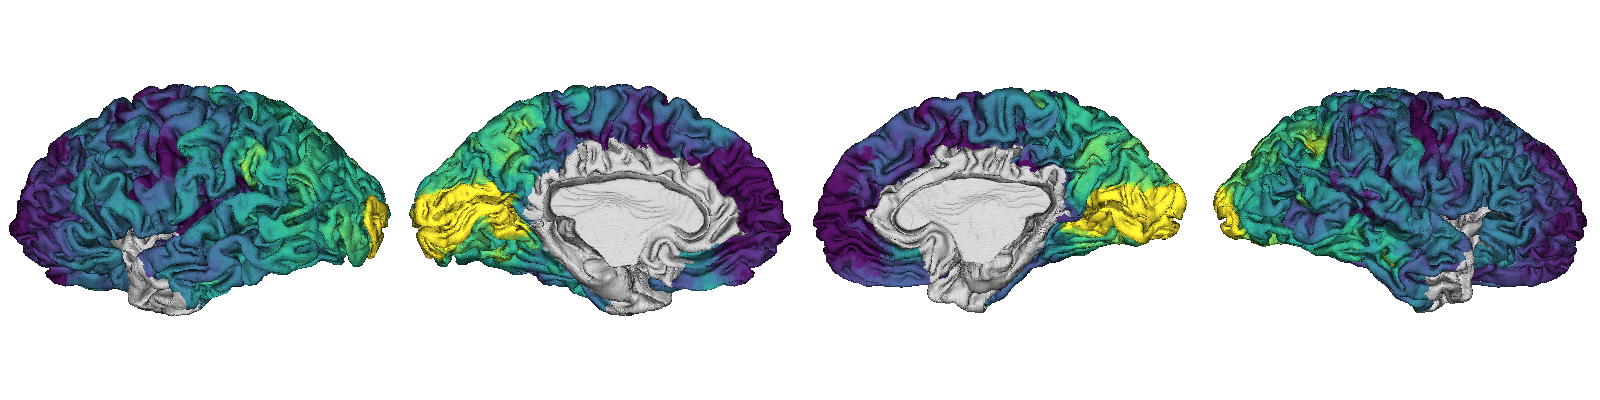

BA41_42_52


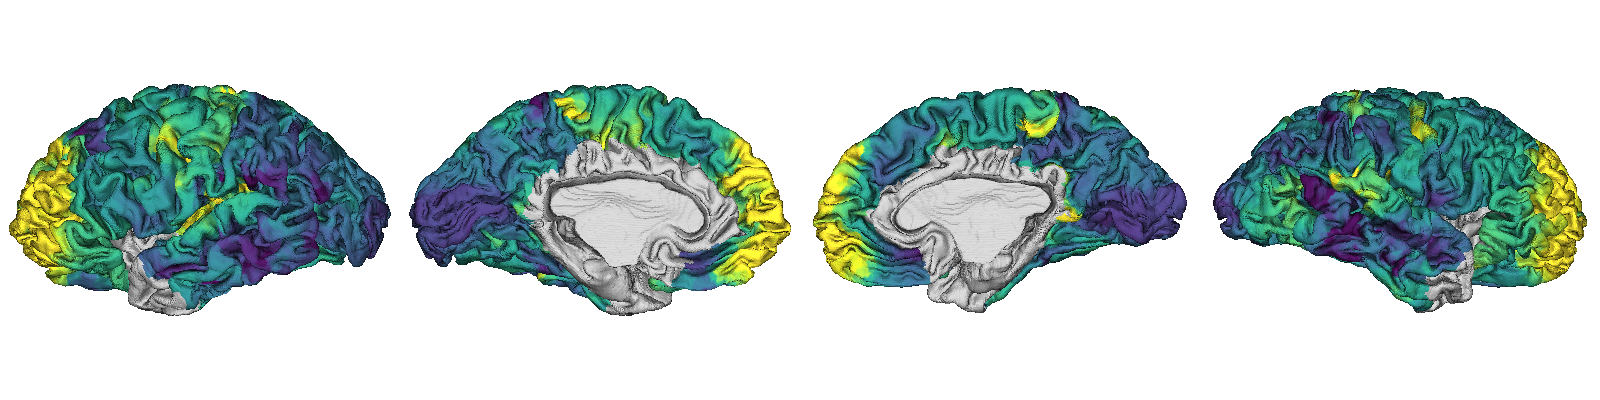

BA1_3


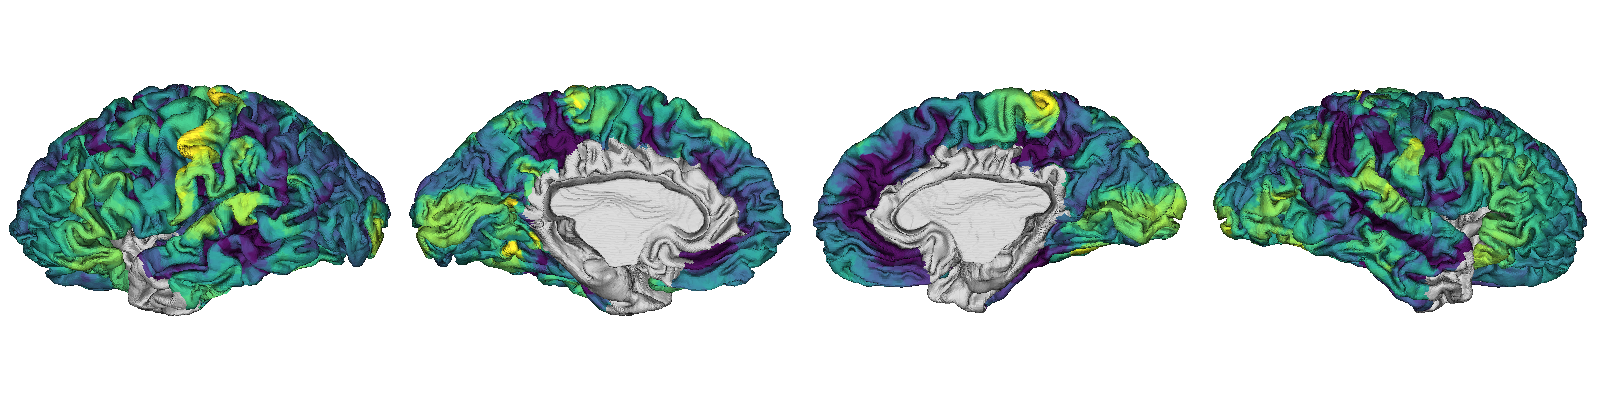

BA44


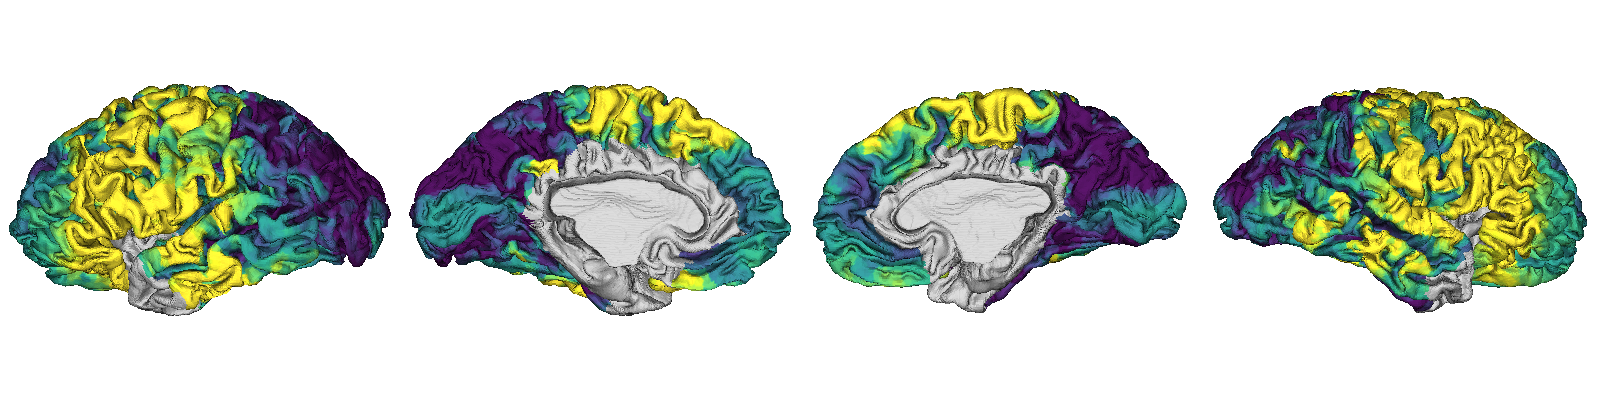

BA10


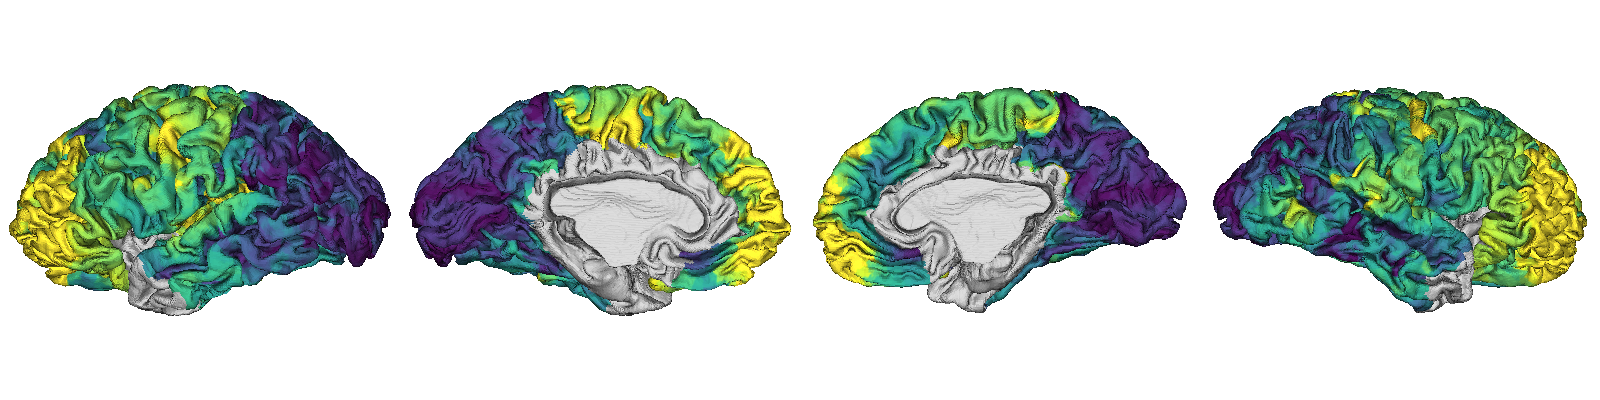

BA4


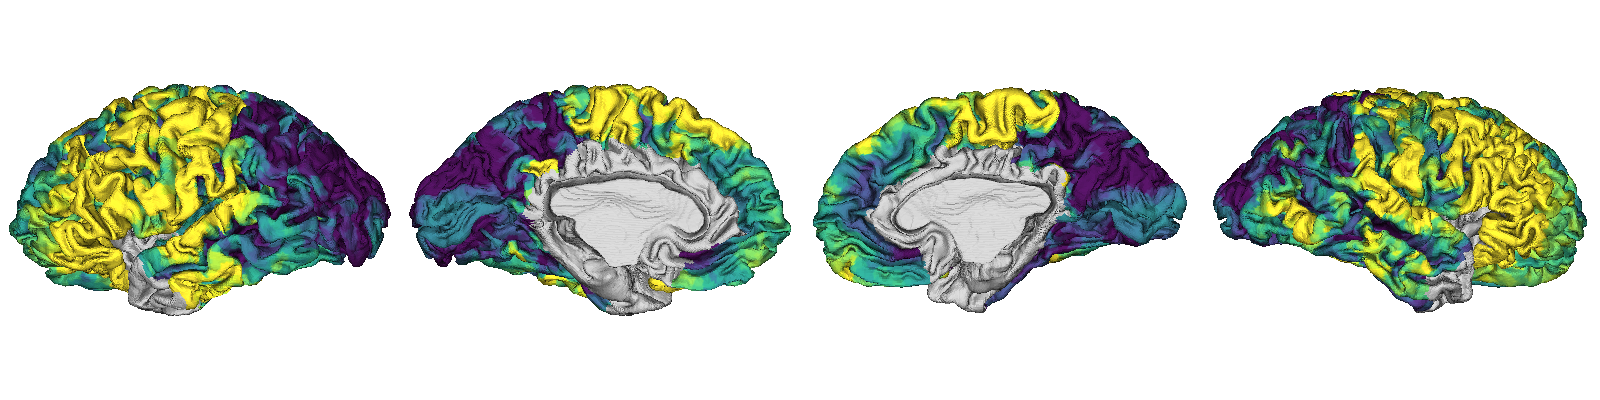

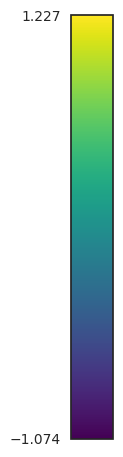

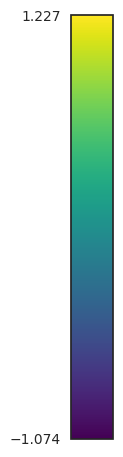

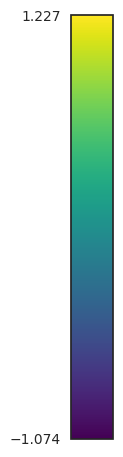

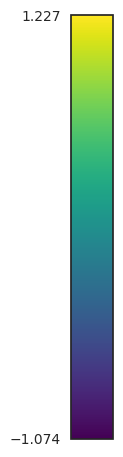

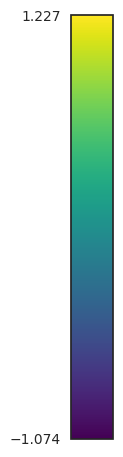

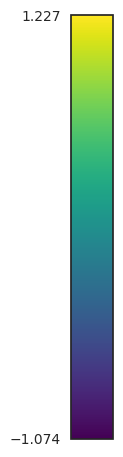

In [2]:
ltc = matrices.MicrostructuralCovarianceMatrix('thickness', None)
ltc._load()
vmin = np.nanquantile(ltc.matrix.values, 0.1)
vmax = np.nanquantile(ltc.matrix.values, 0.9)
brodmann_lh_parcel_centers = helpers.get_parcel_center_indices('brodmann', downsampled=True)['L']
for roi in ['BA17', 'BA41_42_52', 'BA1_3', 'BA44', 'BA10', 'BA4']:
    print(roi)
    center_vertex = brodmann_lh_parcel_centers.loc[roi]
    # get nodal ltc (while taking care of removed vertices)
    nodal_ltc = pd.concat([ltc.matrix.loc[center_vertex], pd.Series(0, index=np.arange(datasets.N_VERTICES_HEM_BB_ICO5*2))], axis=1).iloc[:, 0]
    nodal_ltc = helpers.upsample(nodal_ltc.values)
    display(helpers.plot_surface(nodal_ltc, inflate=False, plot_downsampled=False, vrange=(vmin, vmax), cbar=True))